In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
dataset = pd.read_csv("Loan_elgibility_prediction.csv")

In [4]:
dataset.head()

,Loan_ID,Applicant_age,Gender,Marital_Status,Location,No_of_dependents,Education,Self_employed,Income_annum,Loan_amount,...,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Total_assests,Loan_purpose,Interest_rate,EMI_amt,No_of_previous_loan,Credit_utilization_ratio,Loan_status
0,L1,25,Male,Married,Dubai,2,Graduate,No,9600000,29900000,...,17600000,22700000,8000000,50700000,Business Loan,13.76,28580,1,0.85,Approved
1,L2,52,Female,Single,Chennai,0,Not Graduate,Yes,4100000,12200000,...,2200000,8800000,3300000,17000000,Car Loan,14.09,78212,3,0.76,Rejected
2,L3,51,Female,Married,Chennai,3,Graduate,No,9100000,29700000,...,4500000,33300000,12800000,57700000,Personal Loan,5.39,78016,2,0.14,Rejected
3,L4,23,Female,Married,Bengaluru,3,Graduate,No,8200000,30700000,...,3300000,23300000,7900000,52700000,Business Loan,6.90,139338,2,0.36,Rejected
4,L5,46,Female,Single,Sydney,5,Not Graduate,Yes,9800000,24200000,...,8200000,29400000,5000000,55000000,Home Loan,5.25,146342,2,0.68,Rejected


In [5]:
dataset.shape

(529, 23)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   529 non-null    object 
 1   Applicant_age             529 non-null    int64  
 2   Gender                    529 non-null    object 
 3   Marital_Status            529 non-null    object 
 4   Location                  529 non-null    object 
 5   No_of_dependents          529 non-null    int64  
 6   Education                 529 non-null    object 
 7   Self_employed             529 non-null    object 
 8   Income_annum              529 non-null    int64  
 9   Loan_amount               529 non-null    int64  
 10  Loan_term                 529 non-null    int64  
 11  Cibil_score               529 non-null    int64  
 12  Residential_assets_value  529 non-null    int64  
 13  Commercial_assets_value   529 non-null    int64  
 14  Luxury_ass

In [7]:
dataset.columns = dataset.columns.str.strip()
for col in dataset.select_dtypes(include='object').columns:
    dataset[col] = dataset[col].str.strip()    
print("Missing values before cleaning:")
print(dataset.isnull().sum())
print("\nNumber of duplicate rows before cleaning:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", dataset.duplicated().sum())
print("\nDataFrame info after cleaning:")
print(dataset.info())
print("\nFirst 5 rows of the cleaned dataset:")
print(dataset.head())
output_file = 'cleaned_loan_elgibility_dataset.csv'
dataset.to_csv(output_file, index=False)
print(f"\nCleaned data saved to {output_file}")

Missing values before cleaning:
Loan_ID                     0
Applicant_age               0
Gender                      0
Marital_Status              0
Location                    0
No_of_dependents            0
Education                   0
Self_employed               0
Income_annum                0
Loan_amount                 0
Loan_term                   0
Cibil_score                 0
Residential_assets_value    0
Commercial_assets_value     0
Luxury_assets_value         0
Bank_asset_value            0
Total_assests               0
Loan_purpose                0
Interest_rate               0
EMI_amt                     0
No_of_previous_loan         0
Credit_utilization_ratio    0
Loan_status                 0
dtype: int64

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 23 columns):
 #   Column                    Non-Null 

In [8]:
dataset = pd.read_csv('cleaned_loan_elgibility_dataset.csv')

In [9]:
pd.crosstab(dataset['Credit_utilization_ratio'], dataset['Loan_status'], margins=True)

Loan_status,Approved,Rejected,All
Credit_utilization_ratio,,,
0.1,3,1,4
0.11,4,4,8
0.12,3,4,7
0.13,3,2,5
0.14,3,3,6
...,...,...,...
0.87,1,1,2
0.88,6,0,6
0.89,6,2,8


Text(0, 0.5, 'Frequency')

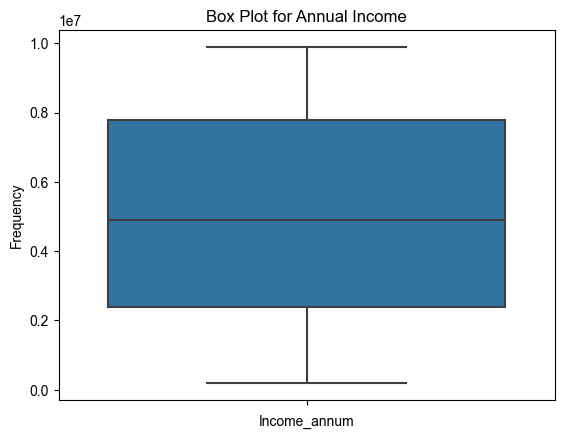

In [10]:
sns.boxplot(y=dataset['Income_annum'])
sns.set_style('whitegrid')
plt.title('Box Plot for Annual Income')
plt.xlabel('Income_annum')
plt.ylabel('Frequency')

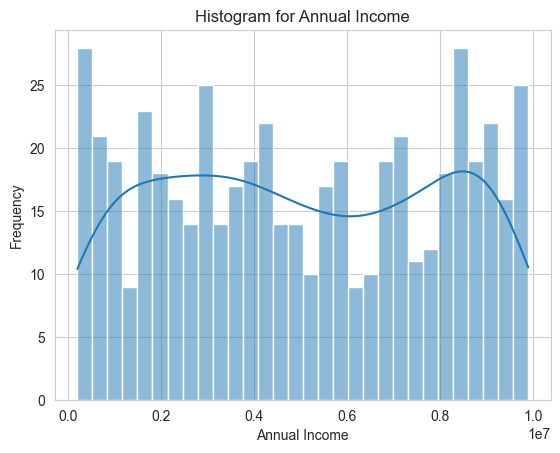

In [11]:
sns.set_style('whitegrid')
sns.histplot(dataset['Income_annum'], bins=30, kde=True)
plt.title('Histogram for Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

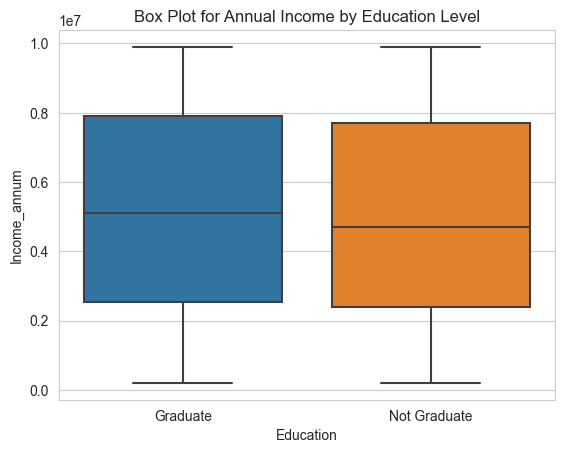

In [12]:
sns.boxplot(x='Education', y='Income_annum', data=dataset)
plt.title('Box Plot for Annual Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Income_annum')
plt.show()

In [13]:
print("\nDescriptive statistics:")
print(dataset.describe())


Descriptive statistics:
       Applicant_age  No_of_dependents  Income_annum   Loan_amount  \
count     529.000000        529.000000  5.290000e+02  5.290000e+02   
mean       43.440454          2.580340  5.031947e+06  1.508526e+07   
std        12.389999          1.662211  2.961652e+06  9.551379e+06   
min        22.000000          0.000000  2.000000e+05  6.000000e+05   
25%        33.000000          1.000000  2.400000e+06  7.000000e+06   
50%        44.000000          3.000000  4.900000e+06  1.440000e+07   
75%        54.000000          4.000000  7.800000e+06  2.150000e+07   
max        64.000000          5.000000  9.900000e+06  3.950000e+07   

        Loan_term  Cibil_score  Residential_assets_value  \
count  529.000000   529.000000              5.290000e+02   
mean    11.217391   598.217391              7.256333e+06   
std      5.536381   172.914609              6.667947e+06   
min      2.000000   300.000000             -1.000000e+05   
25%      6.000000   452.000000              

Text(0, 0.5, 'Frequency')

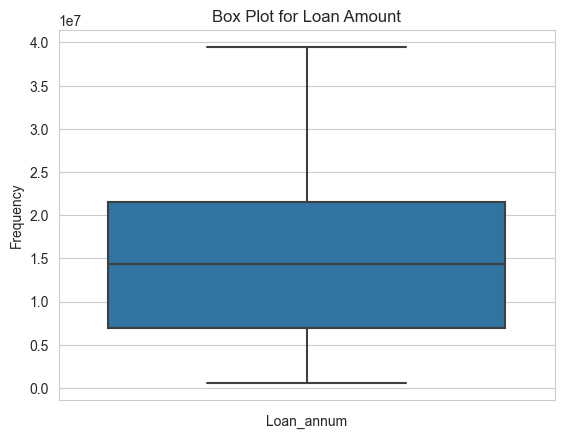

In [14]:
sns.boxplot(y=dataset['Loan_amount'])
sns.set_style('whitegrid')
plt.title('Box Plot for Loan Amount')
plt.xlabel('Loan_annum')
plt.ylabel('Frequency')

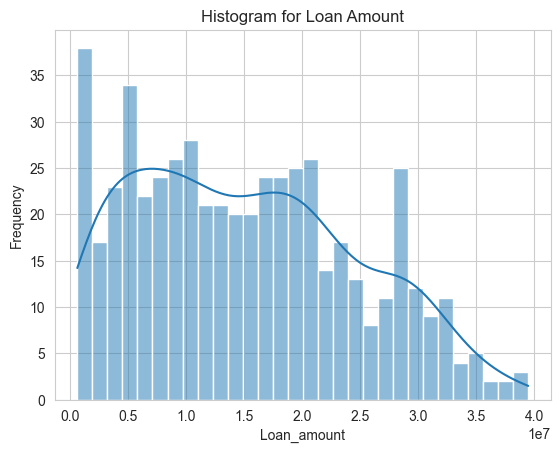

In [15]:
sns.set_style('whitegrid')
sns.histplot(dataset['Loan_amount'], bins=30, kde=True)
plt.title('Histogram for Loan Amount')
plt.xlabel('Loan_amount')
plt.ylabel('Frequency')
plt.show()

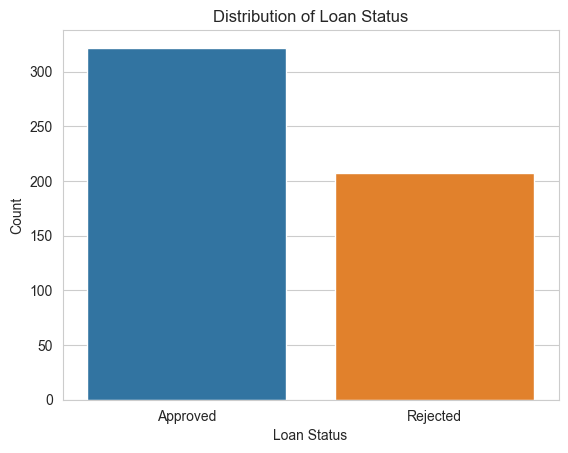

In [16]:
sns.countplot(data=dataset, x='Loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

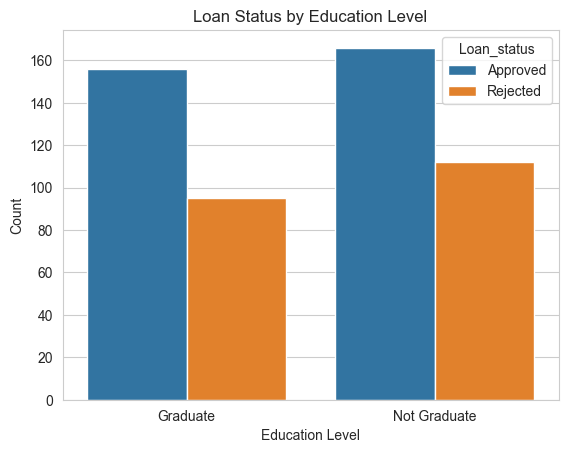

In [17]:
sns.countplot(data=dataset, x='Education', hue='Loan_status')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

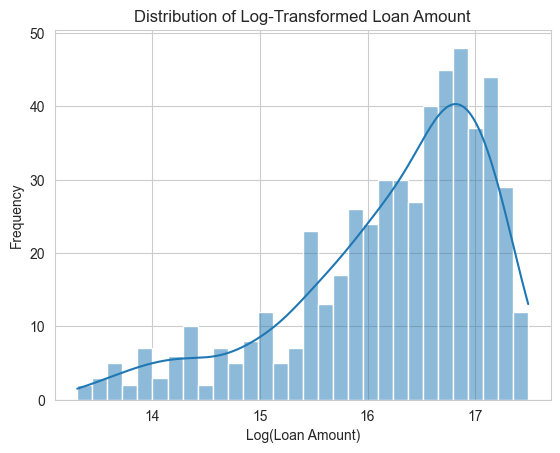

In [18]:
dataset['log_loan_amount'] = np.log(dataset['Loan_amount'])
sns.set_style('whitegrid')
sns.histplot(dataset['log_loan_amount'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Loan Amount')
plt.xlabel('Log(Loan Amount)')
plt.ylabel('Frequency')
plt.show()

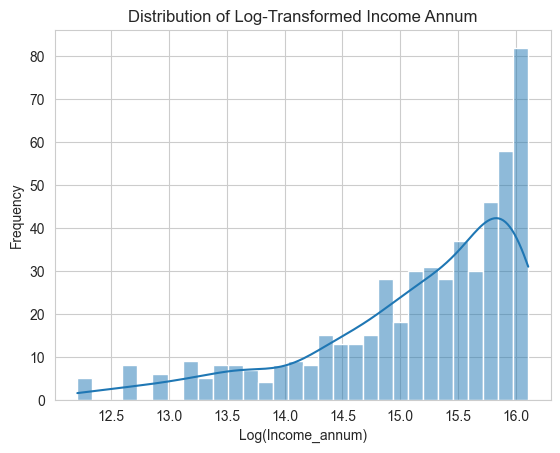

In [19]:
dataset['log_Income_annum'] = np.log(dataset['Income_annum'])
sns.set_style('whitegrid')
sns.histplot(dataset['log_Income_annum'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Income Annum')
plt.xlabel('Log(Income_annum)')
plt.ylabel('Frequency')
plt.show()

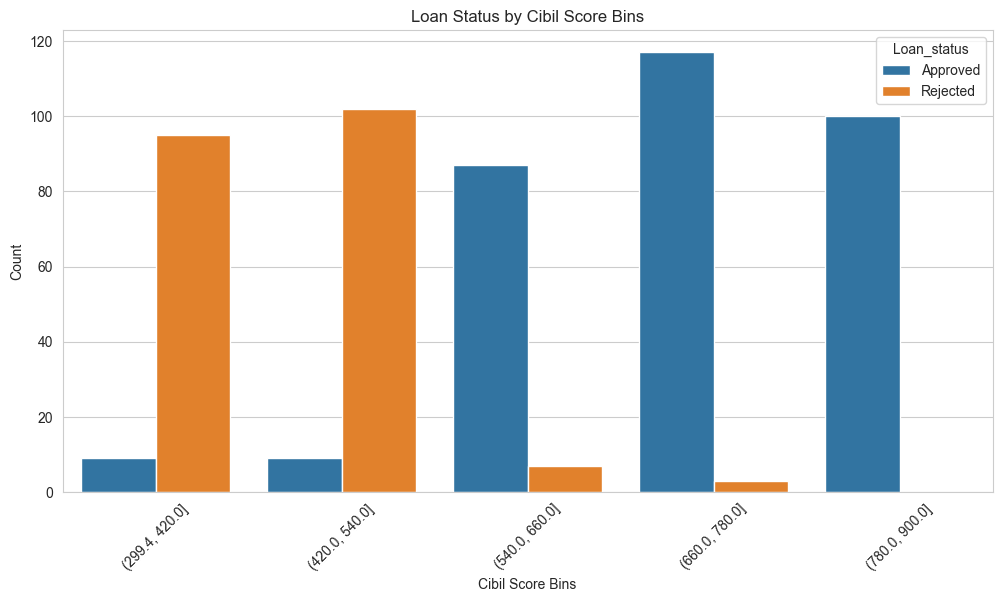

In [20]:
dataset['Cibil_score_bin'] = pd.cut(dataset['Cibil_score'], bins=5)
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Cibil_score_bin', hue='Loan_status')
plt.title('Loan Status by Cibil Score Bins')
plt.xlabel('Cibil Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
dataset.isnull().sum()

Loan_ID                     0
Applicant_age               0
Gender                      0
Marital_Status              0
Location                    0
No_of_dependents            0
Education                   0
Self_employed               0
Income_annum                0
Loan_amount                 0
Loan_term                   0
Cibil_score                 0
Residential_assets_value    0
Commercial_assets_value     0
Luxury_assets_value         0
Bank_asset_value            0
Total_assests               0
Loan_purpose                0
Interest_rate               0
EMI_amt                     0
No_of_previous_loan         0
Credit_utilization_ratio    0
Loan_status                 0
log_loan_amount             0
log_Income_annum            0
Cibil_score_bin             0
dtype: int64

In [22]:
dataset.head()

,Loan_ID,Applicant_age,Gender,Marital_Status,Location,No_of_dependents,Education,Self_employed,Income_annum,Loan_amount,...,Total_assests,Loan_purpose,Interest_rate,EMI_amt,No_of_previous_loan,Credit_utilization_ratio,Loan_status,log_loan_amount,log_Income_annum,Cibil_score_bin
0,L1,25,Male,Married,Dubai,2,Graduate,No,9600000,29900000,...,50700000,Business Loan,13.76,28580,1,0.85,Approved,17.213369,16.077274,"(660.0, 780.0]"
1,L2,52,Female,Single,Chennai,0,Not Graduate,Yes,4100000,12200000,...,17000000,Car Loan,14.09,78212,3,0.76,Rejected,16.316947,15.226498,"(299.4, 420.0]"
2,L3,51,Female,Married,Chennai,3,Graduate,No,9100000,29700000,...,57700000,Personal Loan,5.39,78016,2,0.14,Rejected,17.206658,16.023785,"(420.0, 540.0]"
3,L4,23,Female,Married,Bengaluru,3,Graduate,No,8200000,30700000,...,52700000,Business Loan,6.90,139338,2,0.36,Rejected,17.239773,15.919645,"(420.0, 540.0]"
4,L5,46,Female,Single,Sydney,5,Not Graduate,Yes,9800000,24200000,...,55000000,Home Loan,5.25,146342,2,0.68,Rejected,17.001863,16.097893,"(299.4, 420.0]"


In [23]:
X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y= dataset.iloc[:,12].values

In [24]:
X

array([[25, 'Male', 'Married', ..., 12, 17600000, 22700000],
       [52, 'Female', 'Single', ..., 8, 2200000, 8800000],
       [51, 'Female', 'Married', ..., 20, 4500000, 33300000],
       ...,
       [44, 'Male', 'Married', ..., 14, 4400000, 5500000],
       [57, 'Male', 'Married', ..., 10, 2000000, 5400000],
       [32, 'Female', 'Single', ..., 4, 12200000, 17800000]], dtype=object)

In [25]:
y

array([ 2400000,  2700000,  7100000, 18200000, 12400000,  6800000,
       22500000, 13200000,  1300000,  3200000,  8100000, 15300000,
        6400000, 10800000,  1900000,  5700000,  1300000,  2900000,
        1000000, 10300000,  9500000,  3800000, 13100000,   900000,
        3800000,  7900000, 11500000,  4500000,  2300000, 21800000,
       20200000,  3600000,   700000,  3800000,  9700000,  2700000,
        3400000,  6400000,  7000000,   100000,  8600000, 22300000,
         200000,  2200000, 18200000, 13000000,  2400000,  5400000,
         800000,   100000,   500000,  6800000,  8700000, 15400000,
        7400000,  1200000,  2100000, 19300000, 18500000,  -100000,
       23800000,  4700000, 24400000,  1600000,  7600000,  9500000,
        6100000,   200000,  5500000,  4000000,   100000,  2700000,
       18400000,  3900000,  6500000,   600000, 14300000, 11600000,
       17600000,  1900000,  1300000,  2900000, 25500000,  9400000,
        5300000, 17100000,  1300000, 20400000,  5100000, 24100

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print(X_train)

[[31 'Female' 'Single' ... 10 500000 800000]
 [42 'Female' 'Married' ... 4 4000000 18700000]
 [36 'Female' 'Single' ... 2 500000 1900000]
 ...
 [31 'Male' 'Single' ... 10 1400000 3300000]
 [63 'Female' 'Single' ... 18 2300000 6500000]
 [53 'Female' 'Married' ... 8 1100000 2900000]]


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [29]:
for i in range(0, 5):
    X_train[:,i]= labelencoder_X.fit_transform(X_train[:,i])

In [30]:
X_train[:,7]= labelencoder_X.fit_transform(X_train[:,7])

In [31]:
X_train

array([[9, 0, 1, ..., 10, 500000, 3],
       [20, 0, 0, ..., 4, 4000000, 130],
       [14, 0, 1, ..., 2, 500000, 12],
       ...,
       [9, 1, 1, ..., 10, 1400000, 23],
       [41, 0, 1, ..., 18, 2300000, 48],
       [31, 0, 0, ..., 8, 1100000, 20]], dtype=object)

In [32]:
labelencoder_y=LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [33]:
y_train

array([ 10,  12,  14,  51, 131, 145,  58,  29, 117,  95,  30,  53,  21,
        36, 143,  18,  76,  43,   4, 128,  84,  43,  70, 155,  16,   2,
         8,  46,  89, 175,  22, 171, 165,  14,   1,  39,  62,  82, 124,
        99,  75,  43, 163,  72,  31, 173, 109,  12,   0,   5,  34,  27,
       136, 146,  58,  13,  22,  20,   7,  88,   1,  42, 123,  19,  80,
        64, 103,  70,  11, 110,  58,   6,   4,  65,  12,  73,   7,  13,
        51, 116,  55,  86, 120,  20,  41,  94,  34,  42,  71, 170,  43,
         2,  30,  15,  27,  35,  42,   6, 109,  57,  15,  14, 150,  67,
         1, 162,  65,  57,  81, 139,  98,  12, 164,   7, 149,  17,  66,
        47,  30,   2,  46,   9,  26,  36,  13, 172,  39,   6,  75,  10,
       160, 158, 152,  27,  83,  11, 138, 130,   4,  17, 125,  31,   2,
        26, 143,   6,   2,  60,  18,  78,   9,  63,  68, 121,  25, 154,
        39, 132, 107,  46,  11,  41, 129,  73,   3,  19,  59, 153,  11,
        35,   9,   8, 105,  39,  51, 147,  47, 102, 142,  37,  1

In [34]:
for i in range(0, 5):
    X_test[:,i]= labelencoder_X.fit_transform(X_test[:,i])

In [35]:
X_test[:,7]= labelencoder_X.fit_transform(X_test[:,7])

In [36]:
X_test

array([[32, 0, 0, 8, 61, 2, 3800000, 61],
       [17, 1, 1, 2, 73, 6, 300000, 54],
       [19, 0, 1, 4, 8, 10, 400000, 4],
       [8, 1, 0, 3, 17, 18, 2500000, 12],
       [35, 1, 0, 2, 52, 18, 900000, 49],
       [37, 1, 1, 8, 48, 16, 9500000, 51],
       [12, 0, 1, 1, 1, 20, 400000, 1],
       [13, 0, 0, 1, 48, 14, 7900000, 50],
       [1, 0, 0, 9, 31, 10, 3900000, 52],
       [15, 1, 0, 9, 68, 16, 5600000, 76],
       [37, 0, 0, 8, 58, 4, 1500000, 85],
       [21, 1, 0, 7, 21, 16, 500000, 11],
       [29, 1, 0, 1, 62, 20, 8900000, 84],
       [40, 0, 1, 1, 26, 14, 2800000, 15],
       [12, 1, 0, 1, 29, 6, 1700000, 30],
       [9, 1, 0, 9, 13, 18, 3700000, 16],
       [15, 0, 1, 5, 49, 20, 2100000, 33],
       [35, 0, 1, 8, 4, 10, 700000, 5],
       [21, 0, 0, 7, 64, 14, 1500000, 45],
       [32, 1, 1, 2, 7, 14, 100000, 6],
       [11, 0, 0, 7, 78, 12, 5600000, 72],
       [17, 0, 0, 4, 56, 4, 9700000, 35],
       [29, 1, 0, 4, 0, 10, 200000, 0],
       [38, 0, 0, 7, 12, 12, 1700000,

In [37]:
labelencoder_y=LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [38]:
y_test

array([62, 40,  1,  6, 25,  2,  1, 43, 39, 67, 76, 34, 35, 21, 35, 26, 55,
        2, 28, 17, 69, 20,  3,  7, 46, 29,  6, 65,  7,  9, 65, 13, 31, 53,
       24, 22, 15, 18, 61, 58, 60, 56,  2, 49, 77, 30, 54, 36, 33,  8, 66,
       50, 27,  5, 72, 23, 47, 20, 36, 38, 10, 32, 78, 80,  0, 45, 42, 57,
       14, 15, 11,  2, 36, 48, 41, 16,  3, 37, 20, 73, 40, 74, 10,  4, 47,
       64, 58, 71, 29, 44, 43, 59, 32, 63, 52, 79, 51, 46, 12,  1, 25, 75,
       68, 55, 70, 19], dtype=int64)

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred=DTClassifier.predict(X_test)
y_pred

array([ 39,  73,   3,  56,  38, 146,   6,  57,  97,  47,  39,  20, 132,
         6,  60,  23, 115,   9,  25,  14, 130, 120,   5,   2, 129, 174,
        14, 105,  13,  75,   4,  62, 164,  51,  63, 139, 155,  45, 130,
       138, 112, 133,   8,  57,  65, 169,  84,   3,  67,  23,  84,  97,
       139, 101, 177,  20,  11,  74,  86,  72,  74,  89,   3,  84,  16,
        41,  24, 138,   8, 105,  24,  22, 116,  25,  13,   6,  30,  39,
        13, 177,  75,  43, 123,  25,   6,  11,  75,  85,  46,  27,  22,
       117,   1, 133,  63, 165,  38,  36,  14,   2,  25, 143, 109, 139,
       140,   2], dtype=int64)

In [42]:
from sklearn import metrics
print('The accuracy of decision tree is: ', metrics.accuracy_score(y_pred,y_test))

The accuracy of decision tree is:  0.009433962264150943


In [43]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,y_train)

GaussianNB()

In [44]:
y_pred= NBClassifier.predict(X_test)

In [45]:
y_pred

array([ 12,  30,  30,  17,  16,  43,   5,  85,  47,  74,  12,  11,  79,
         2,  46,  17,  41,  11, 129,  16,  74,  85,   5,  17, 129,  46,
        11,  42,  13,  75,  39,  14, 171,   2,  13,  79, 171,  25,  74,
       139,  97,  57,  17,  40,  97, 171,  43,  22,  49,  17,  75,  93,
        93,  47, 159,  13,  19,  41, 139,  11,  52,  52, 152,  97,   5,
        41,  79,  79,  16,  42,  16,  49, 171,  34,   2,  17,  16,  38,
         2, 159,  75,  75,  57,   6,  19,  57,  75, 152,  16, 139,   1,
        51, 120,  47,  51,  43,  88,   3,  17,   1,  22,  97, 152,  65,
        42,  17], dtype=int64)

In [46]:
print('The accuracy of Naive Bayes is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of Naive Bayes is:  0.009433962264150943


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
GBClassifier = GradientBoostingClassifier()
GBClassifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [48]:
y_pred= GBClassifier.predict(X_test)

In [49]:
y_pred

array([ 57, 143,   2,  46,  96,  57,  11,   1,  80,  20, 132,  18,  70,
        64,  89,  19, 118,   2,  39,   2, 138,  65,   5,   7,  79,  20,
        20,  39,  12,  14,  41,  56, 136,  35,  71,  74,  43,  60,  71,
        86,   0,   7,   4,  14,  86,  32,  43,  64,  14,  15,  32,  97,
       148, 135, 112,  13,  74,  52, 102,  38,  56,  76, 128, 171,   4,
        14,  20,  99,  13,  41,  39,  22,   2,  14,  47,   2,  46,  49,
         2, 141, 139,  43,  86,  27,  54,  47,  14,   7,   6, 139,  35,
       117,  14,   6,   6,  43,  35,  82,  15,  27,  14, 165, 156,  39,
         7,  18], dtype=int64)

In [50]:
print('The accuracy of Gradient Boosting is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of Gradient Boosting is:  0.02830188679245283


In [51]:
from catboost import CatBoostClassifier
CBClassifier = CatBoostClassifier()
CBClassifier.fit(X_train,y_train)
y_pred= CBClassifier.predict(X_test)
y_pred
print('The accuracy of Cat Boost is: ',metrics.accuracy_score(y_pred,y_test))

Learning rate set to 0.07573
0:	learn: 5.1681946	total: 292ms	remaining: 4m 51s
1:	learn: 5.1427517	total: 410ms	remaining: 3m 24s
2:	learn: 5.1184877	total: 536ms	remaining: 2m 58s
3:	learn: 5.0920675	total: 650ms	remaining: 2m 41s
4:	learn: 5.0669762	total: 772ms	remaining: 2m 33s
5:	learn: 5.0410721	total: 884ms	remaining: 2m 26s
6:	learn: 5.0174796	total: 1s	remaining: 2m 22s
7:	learn: 4.9923120	total: 1.12s	remaining: 2m 19s
8:	learn: 4.9661781	total: 1.25s	remaining: 2m 17s
9:	learn: 4.9433056	total: 1.36s	remaining: 2m 15s
10:	learn: 4.9186173	total: 1.49s	remaining: 2m 13s
11:	learn: 4.8950207	total: 1.6s	remaining: 2m 11s
12:	learn: 4.8692869	total: 1.73s	remaining: 2m 11s
13:	learn: 4.8453870	total: 1.87s	remaining: 2m 11s
14:	learn: 4.8210005	total: 2s	remaining: 2m 11s
15:	learn: 4.7976436	total: 2.12s	remaining: 2m 10s
16:	learn: 4.7733911	total: 2.24s	remaining: 2m 9s
17:	learn: 4.7488584	total: 2.35s	remaining: 2m 8s
18:	learn: 4.7247522	total: 2.48s	remaining: 2m 7s
19:

In [52]:
from xgboost import XGBClassifier
XGClassifier = XGBClassifier()
XGClassifier.fit(X_train,y_train)
y_pred= XGClassifier.predict(X_test)

In [53]:
y_pred

array([  3,  30,   6,  41,  39,  97,   5,  85, 127,  74,  42,   6, 176,
        51,  89,  58,  41,   2, 129,  17,  47,  85,  20,   1, 132,  46,
         6,  42,  14,  85,  11,  17,  57,  35,  62, 173,  73,  12,  74,
       115,  79, 133,  17,  57, 119,  75,  74,  73,  23,  15,  36,  97,
        93,   6,  51,  13,  51,  74,  86,  38,  65,  74,  75,  82,   2,
        26, 157, 145,  16,  63,  13,  49,  51,   2,  47,   4,  51,  39,
        11,  58, 139, 176, 115,  25,  80,  41,  75, 152,  16, 139,  35,
        51,  14,  12,  14, 164,  16,  75,  58,  31,  41, 170,  32,  14,
       140,  17], dtype=int64)

In [54]:
print('The accuracy of  XG Boost is: ',metrics.accuracy_score(y_pred,y_test))

The accuracy of  XG Boost is:  0.03773584905660377


In [55]:
dataset_encoded = pd.get_dummies(dataset, columns=['Gender'], drop_first=True)
print(dataset_encoded[['Gender_Male']].head())


   Gender_Male
0         True
1        False
2        False
3        False
4        False


In [56]:
dataset_encoded = pd.get_dummies(dataset, columns=['Gender'], drop_first=False)
print(dataset_encoded[['Gender_Female']].head())

   Gender_Female
0          False
1           True
2           True
3           True
4           True


In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
DTClassifier = DecisionTreeClassifier(max_depth=5, random_state=10)
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

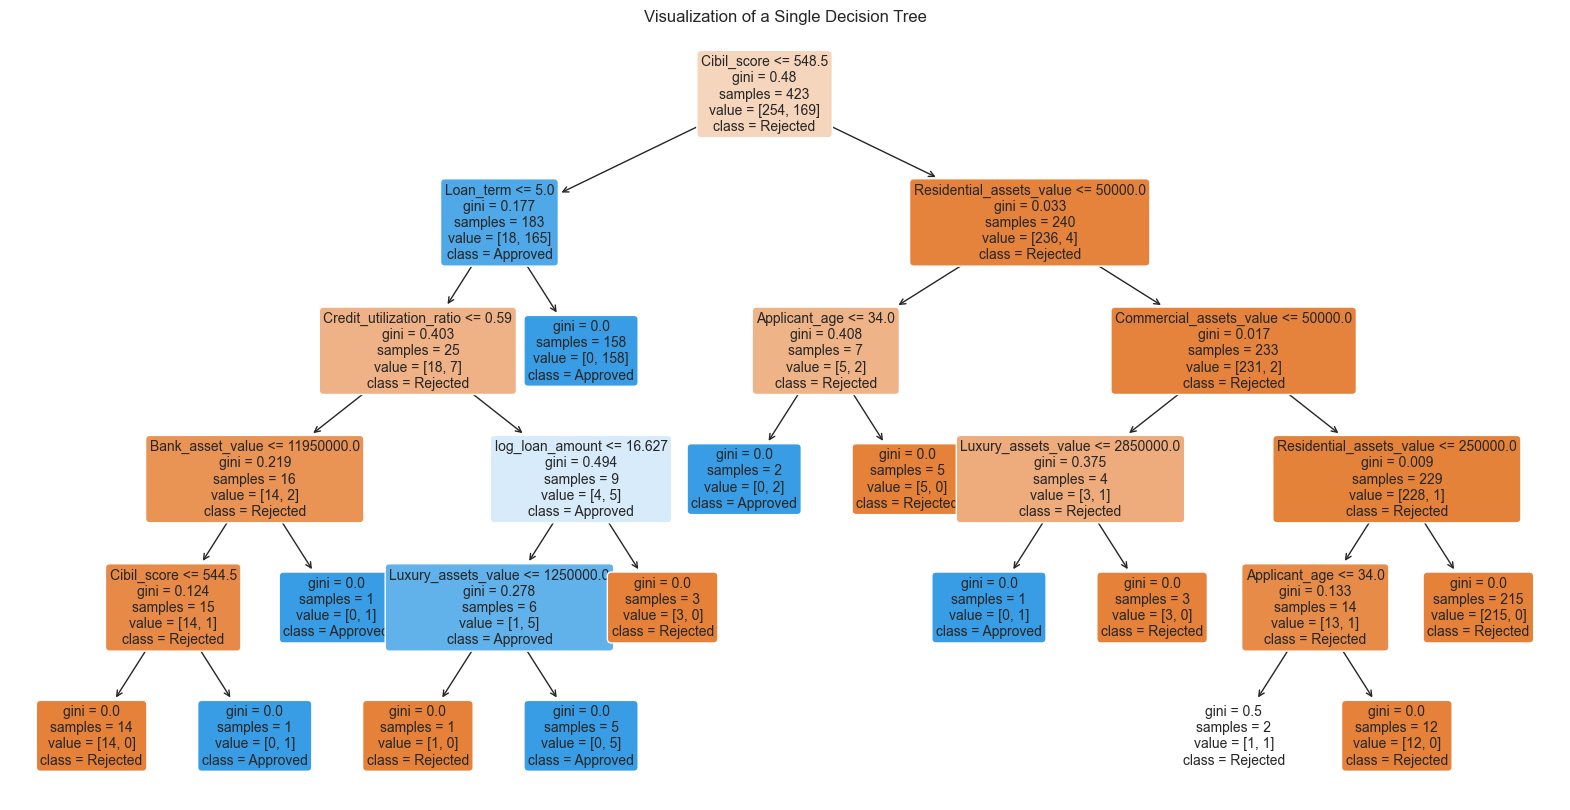

In [61]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['Rejected', 'Approved'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Visualization of a Single Decision Tree')
plt.savefig('decision_tree_plot.png')


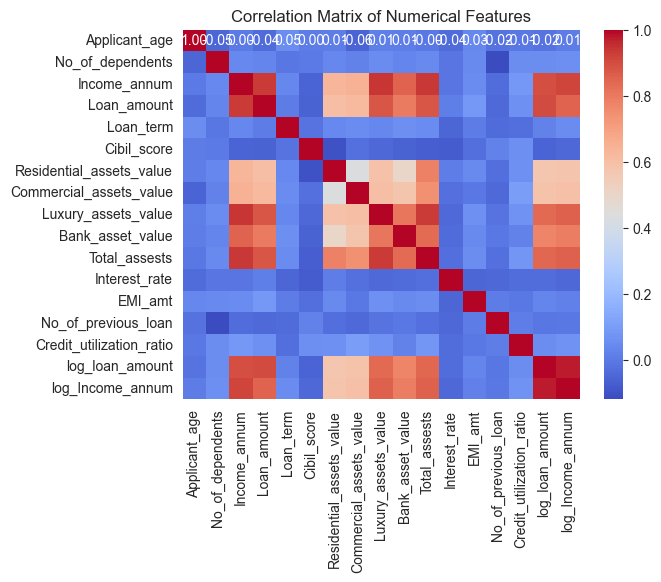

In [70]:
numerical_dataset = dataset.select_dtypes(include=np.number)
sns.heatmap(numerical_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()




In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [77]:
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = model.predict(X_test)

In [81]:
y_pred

array(['Approved', 'Approved', 'Approved', 'Approved', 'Approved',
       'Rejected', 'Rejected', 'Approved', 'Rejected', 'Approved',
       'Approved', 'Approved', 'Approved', 'Approved', 'Approved',
       'Approved', 'Rejected', 'Approved', 'Approved', 'Rejected',
       'Rejected', 'Approved', 'Rejected', 'Approved', 'Approved',
       'Approved', 'Approved', 'Rejected', 'Rejected', 'Approved',
       'Approved', 'Approved', 'Approved', 'Approved', 'Rejected',
       'Approved', 'Rejected', 'Rejected', 'Rejected', 'Rejected',
       'Approved', 'Approved', 'Approved', 'Approved', 'Approved',
       'Approved', 'Approved', 'Rejected', 'Rejected', 'Approved',
       'Approved', 'Rejected', 'Rejected', 'Approved', 'Rejected',
       'Approved', 'Approved', 'Approved', 'Rejected', 'Approved',
       'Approved', 'Rejected', 'Rejected', 'Rejected', 'Approved',
       'Approved', 'Rejected', 'Approved', 'Approved', 'Rejected',
       'Approved', 'Approved', 'Approved', 'Approved', 'Approv

In [82]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9528301886792453

Classification Report:
               precision    recall  f1-score   support

    Approved       0.93      1.00      0.96        68
    Rejected       1.00      0.87      0.93        38

    accuracy                           0.95       106
   macro avg       0.97      0.93      0.95       106
weighted avg       0.96      0.95      0.95       106



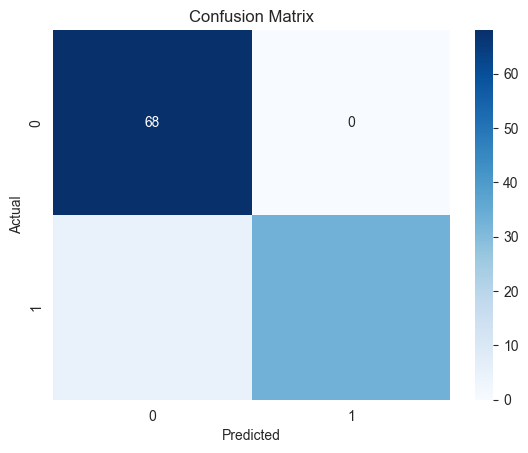

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()